### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:



![XNote_201901081613670[1].jpg](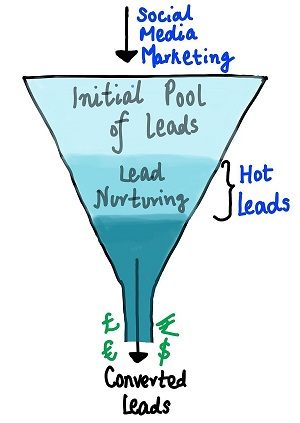)

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

**Data**  
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

### Goals of the Case Study

There are quite a few goals for this case study.

-    Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
-    There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Results Expected



1.    A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
2.    The word document filled with solutions to all the problems.
3.    The overall approach of the analysis in a presentation
        - Mention the problem statement and the analysis approach briefly 
        - Explain the results in business terms
        - Include visualisations and summarise the most important results in the presentation
4.     A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.

 

***You need to submit the following four components:***

-    Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.
-    Word File: Answer all the questions asked by the company in the word document provided.
-    Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.
-    PDF File: Write the summary report in a word file and submit it as a PDF.

# Solution and Approach
---

## Import Libraries

In [1]:
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt
import statsmodels.api    as sm

from sklearn.model_selection              import train_test_split
from sklearn.preprocessing                import MinMaxScaler, StandardScaler
from sklearn.linear_model                 import LogisticRegression
from sklearn.feature_selection            import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics                      import confusion_matrix,accuracy_score,classification_report,roc_curve, f1_score
from sklearn.metrics                      import roc_auc_score,precision_score, recall_score,precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

**Connect Google Drive**

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

## Step 1 : Read and understand Data

**Load the data to dataframe**

In [3]:
# df_leads = pd.read_csv('/content/drive/My Drive/2 . Machine Learning/lead_score/Leads.csv')
df_leads = pd.read_csv('Leads.csv')

**Check the first five records**

In [4]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**Dimensions of the dataframe**

In [5]:
df_leads.shape

(9240, 37)

**Unique records**

In [6]:
df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

It is observed that Prospect ID and Lead Number has unique 9240 entries and hence removing the features as this corresponds to unique ID for the records.


**Removing columns Prospect ID and Lead Number**

These are the uniques IDs and the number

In [7]:
drop_features = ['Prospect ID','Lead Number']
df_leads.drop(columns=drop_features,inplace=True)

**Null value check - Missing value check**


In [8]:
df_leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

**Dropping features with more than 35% missing data**

In [9]:
drop_features = df_leads.columns[df_leads.isnull().mean()*100>35]
drop_features

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
df_leads.drop(columns=drop_features,inplace=True)

In [11]:
df_leads.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

**Info**

In [12]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

**Describe Method**

*Numerical Data*

In [13]:
df_leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


*Including categorical/Object features*

In [14]:
df_leads.describe(include='all')

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,...,9240,9240,9240,9240,9240,6531,7820,9240,9240,9240
unique,5,21,2,2,NaN,NaN,NaN,NaN,17,38,...,2,2,1,1,1,6,7,1,2,16
top,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,...,No,No,No,No,No,Select,Mumbai,No,No,Modified
freq,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,...,9236,9233,9240,9240,9240,4146,3222,9240,6352,3407
mean,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2 : Data Cleansing and Visualization


**Columns with only one unique value**

In [15]:
features = df_leads.nunique()[df_leads.nunique()==1].index
print('These columns have only one data and there is no inference to be made from such cases.')
print('\n'.join(features))

These columns have only one data and there is no inference to be made from such cases.
Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Get updates on DM Content
I agree to pay the amount through cheque


**Dropping the columns above**

In [16]:
df_leads.drop(columns=features,inplace=True)
df_leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Select,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Select,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Select,Mumbai,No,Modified


**Columns with two unique values**

In [17]:
features = list(df_leads.nunique()[df_leads.nunique()==2].index)
for col in features:
    print(df_leads[col].value_counts(normalize=True),'\n')

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64 

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64 

0    0.61461
1    0.38539
Name: Converted, dtype: float64 

No     0.998485
Yes    0.001515
Name: Search, dtype: float64 

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64 

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64 

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64 

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64 

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64 

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64 



**Converting 'YES' and 'NO' to 0 and 1 respectively**

In [18]:
for col in features:
    df_leads[col]=df_leads[col].map(lambda x: {'YES':1,'NO':0}.get(str(x).upper(),x))
    print(df_leads[col].value_counts(normalize=True),'\n')

0    0.920563
1    0.079437
Name: Do Not Email, dtype: float64 

0    0.999784
1    0.000216
Name: Do Not Call, dtype: float64 

0    0.61461
1    0.38539
Name: Converted, dtype: float64 

0    0.998485
1    0.001515
Name: Search, dtype: float64 

0    0.999784
1    0.000216
Name: Newspaper Article, dtype: float64 

0    0.999892
1    0.000108
Name: X Education Forums, dtype: float64 

0    0.999892
1    0.000108
Name: Newspaper, dtype: float64 

0    0.999567
1    0.000433
Name: Digital Advertisement, dtype: float64 

0    0.999242
1    0.000758
Name: Through Recommendations, dtype: float64 

0    0.687446
1    0.312554
Name: A free copy of Mastering The Interview, dtype: float64 



### **Visualizing the Binary features**

**Lead Conversion Rate**

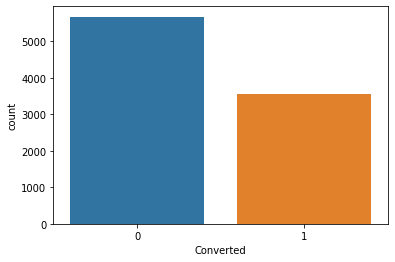

In [19]:
sns.countplot(df_leads['Converted'])
plt.show()

In [20]:
features.remove('Converted')

In [21]:
len(features)

9

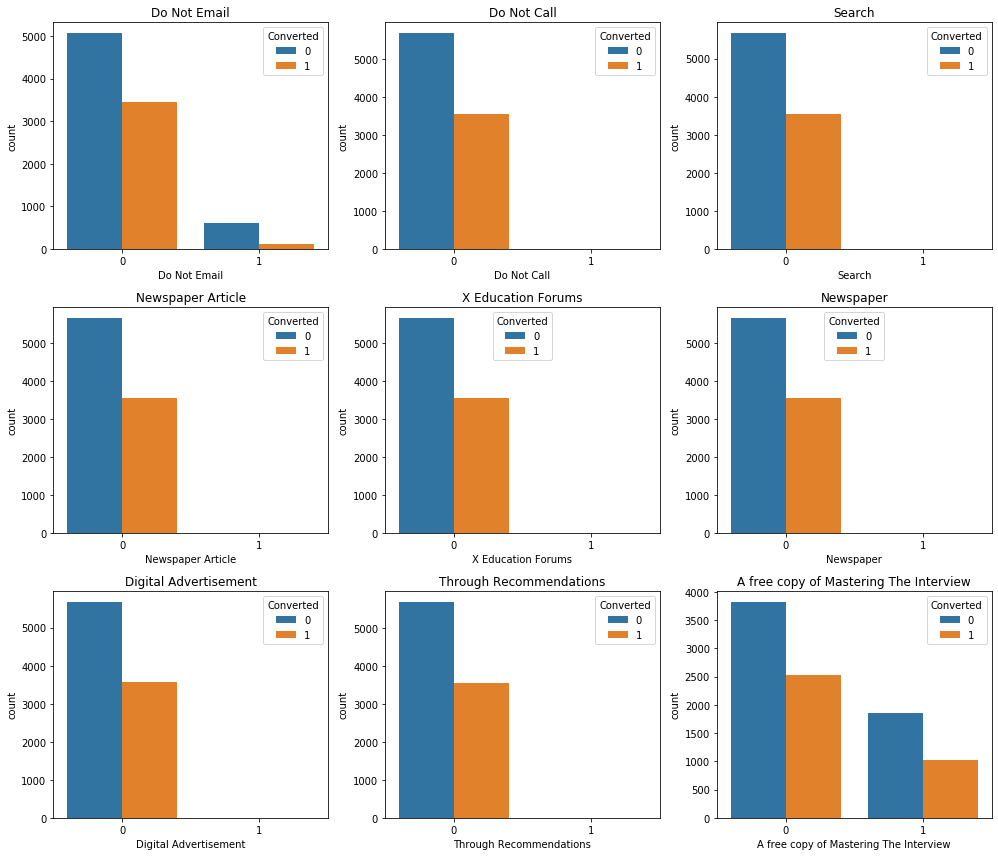

In [22]:
plt.figure(figsize=(14,12))
for i,col in enumerate(features):    
    plt.subplot(3,3,i+1)
    sns.countplot(x=col,hue='Converted',data=df_leads)
    plt.title(col)
plt.tight_layout()
plt.show()

***Dropping Columns with very low variance, i.e. more than 90% similar values***

In [23]:
# High Imbalance data 
drop_features= ['Do Not Email','Do Not Call','Search','Newspaper Article',
                'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']
df_leads.drop(columns=drop_features,inplace=True)

**Columns with more than two unique values**

In [24]:
features = list(df_leads.select_dtypes('object').nunique()[df_leads.select_dtypes('object').nunique()>2].index)
features

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Lead Profile',
 'City',
 'Last Notable Activity']

In [25]:
df_leads[features].nunique()

Lead Origin                                       5
Lead Source                                      21
Last Activity                                    17
Country                                          38
Specialization                                   19
How did you hear about X Education               10
What is your current occupation                   6
What matters most to you in choosing a course     3
Lead Profile                                      6
City                                              7
Last Notable Activity                            16
dtype: int64

### **Visualizing the categorical features**

*Function to print the value counts and generate the plots*

In [26]:
def detail_plot(col_name):
    print((df_leads[col_name].value_counts(normalize=True)*100).round(2),'\n\n')
    
    plt.figure(figsize=(10,5))
    sns.countplot(x=col_name, hue='Converted', data=df_leads)
    plt.title(col_name)
    plt.xticks(rotation=90)
    plt.legend(['No','Yes'],loc='upper right').set_title("Converted")

    plt.show()

*Function to rename x% categories to others*

In [27]:
def group_Others(col_name,perc,isPrint=True):
    perc=perc/100
    others = df_leads[col_name].value_counts(normalize=True)[df_leads[col_name].value_counts(normalize=True)<perc].index
    df_leads[col_name]=df_leads[col_name].apply(lambda x: 'Others_'+col_name if x in others else x)
    if isPrint : detail_plot(col_name)

*Function to remove 'select' to 'NaN'*

In [28]:
def select_to_nan(col_name, isPrint=True):
    df_leads[col_name]=np.where(df_leads[col_name]=='Select',np.nan,df_leads[col_name])
    if isPrint : detail_plot(col_name)

#### **Lead Origin**

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64 




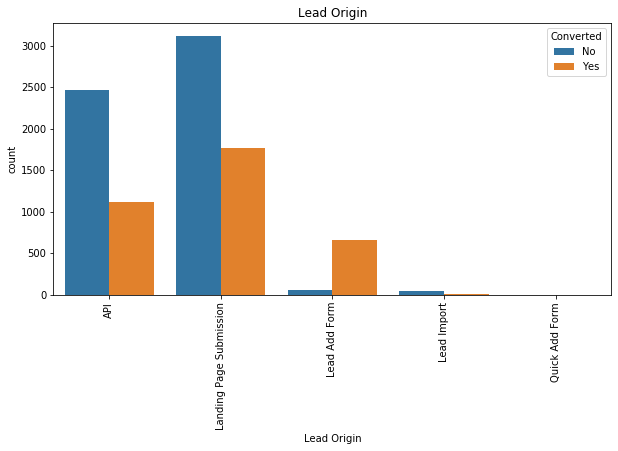

In [29]:
detail_plot('Lead Origin')

**Inference**
- Landing Page Submission, has higher number of leads, and higher number of conversion
- API, also has higher number of leads, and higher number of conversion but bit less compared to landing page submission.
- The Lead Add Form has higher number of conversion rate compared to other categories, however, the number of lead is less.
- Quick Add form has the least number of leads.

#### **Lead Source**

Google               31.16
Direct Traffic       27.63
Olark Chat           19.07
Organic Search       12.54
Reference             5.80
Welingak Website      1.54
Referral Sites        1.36
Facebook              0.60
bing                  0.07
google                0.05
Click2call            0.04
Live Chat             0.02
Press_Release         0.02
Social Media          0.02
welearnblog_Home      0.01
WeLearn               0.01
youtubechannel        0.01
NC_EDM                0.01
blog                  0.01
Pay per Click Ads     0.01
testone               0.01
Name: Lead Source, dtype: float64 




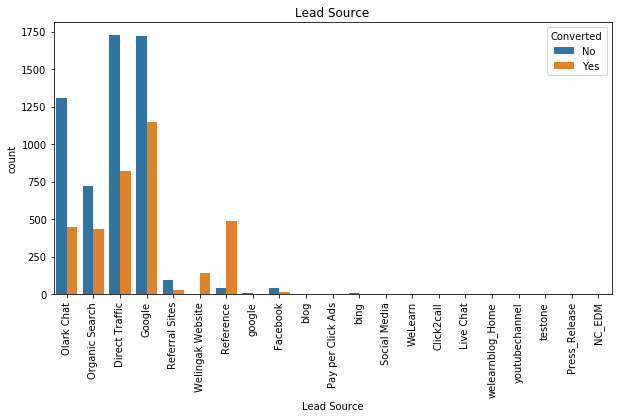

In [30]:
detail_plot('Lead Source')

*There are many categories with very low number of occurrence and so, we can group them to a category called 'others'*

Categorizing < 1% as Others

Google                31.16
Direct Traffic        27.63
Olark Chat            19.07
Organic Search        12.54
Reference              5.80
Welingak Website       1.54
Referral Sites         1.36
Others_Lead Source     0.90
Name: Lead Source, dtype: float64 




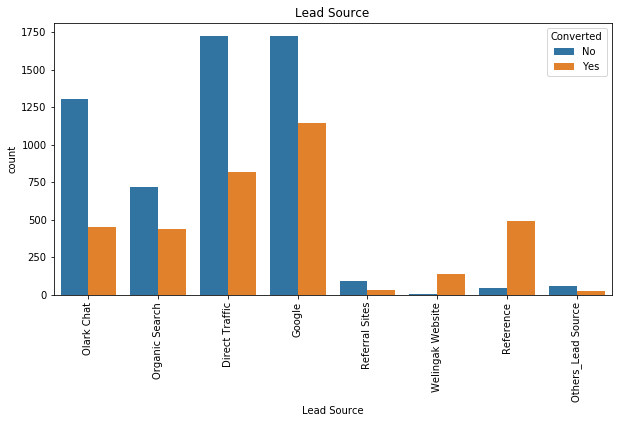

In [31]:
group_Others('Lead Source',1)

**Inference**
- The Direct Traffic and Google has more number of leads, however Google has a higher conversion compared to direct traffic.
- Lead conversion for Reference is Higher and for Welingak Website is also slightly higher.
- Olark Chat ratios conversion rate is lower.

#### **Last Activity**

Email Opened                    37.62
SMS Sent                        30.04
Olark Chat Conversation         10.65
Page Visited on Website          7.00
Converted to Lead                4.68
Email Bounced                    3.57
Email Link Clicked               2.92
Form Submitted on Website        1.27
Unreachable                      1.02
Unsubscribed                     0.67
Had a Phone Conversation         0.33
Approached upfront               0.10
View in browser link Clicked     0.07
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64 




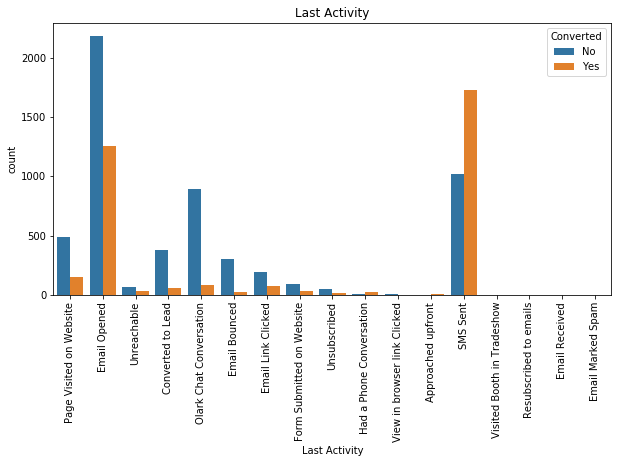

In [32]:
detail_plot('Last Activity')

*There are many categories with very low number of occurrence and so, we can group them to a category called 'others'*

Categorizing < 1% as Others

Email Opened                 37.62
SMS Sent                     30.04
Olark Chat Conversation      10.65
Page Visited on Website       7.00
Converted to Lead             4.68
Email Bounced                 3.57
Email Link Clicked            2.92
Form Submitted on Website     1.27
Others_Last Activity          1.23
Unreachable                   1.02
Name: Last Activity, dtype: float64 




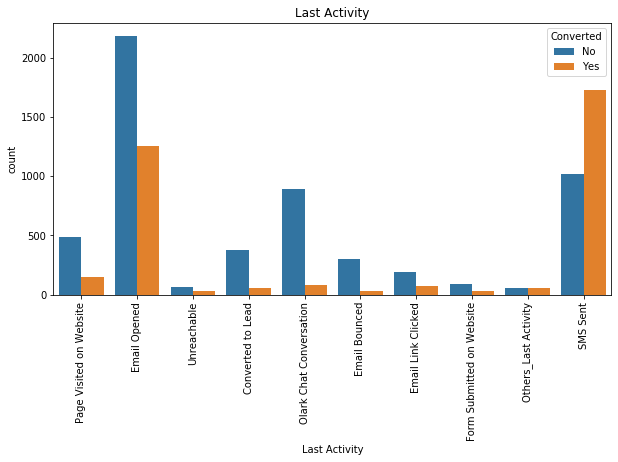

In [33]:
group_Others('Last Activity',1)

**Inference**
- SMS sent leads have highest conversion rate.
- Number of leads are more for email opened  and so is the count of conversions.
- Olark chat conversation has less number of conversions.

#### **Country**

India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Bahrain                  0.10
Hong Kong                0.10
Oman                     0.09
France                   0.09
unknown                  0.07
Canada                   0.06
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Sweden                   0.04
Ghana                    0.03
Belgium                  0.03
Italy                    0.03
China                    0.03
Uganda                   0.03
Netherlands              0.03
Bangladesh               0.03
Asia/Pacific Region      0.03
Philippines              0.03
Sri Lanka                0.01
Indonesia                0.01
Kenya                    0.01
Malaysia                 0.01
Tanzania                 0.01
Switzerlan

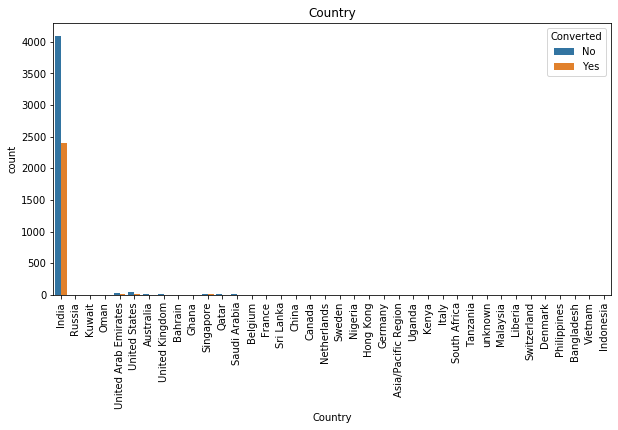

In [34]:
detail_plot('Country')

95.77% candidates are from India 

*Dropping column with 95% values in one category with low variance*

In [35]:
df_leads.drop(columns=['Country'],inplace=True)

#### **Specialization**

Select                               24.89
Finance Management                   12.51
Human Resource Management            10.87
Marketing Management                 10.74
Operations Management                 6.45
Business Administration               5.17
IT Projects Management                4.69
Supply Chain Management               4.47
Banking, Investment And Insurance     4.33
Travel and Tourism                    2.60
Media and Advertising                 2.60
International Business                2.28
Healthcare Management                 2.04
Hospitality Management                1.46
E-COMMERCE                            1.44
Retail Management                     1.28
Rural and Agribusiness                0.94
E-Business                            0.73
Services Excellence                   0.51
Name: Specialization, dtype: float64 




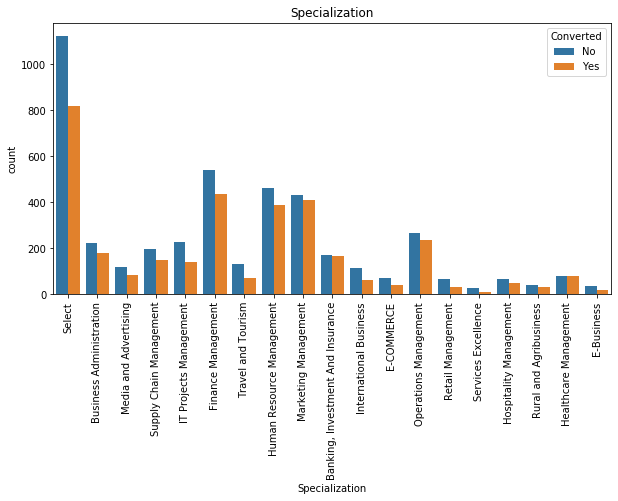

In [36]:
detail_plot('Specialization')

*'Select' has high number of occurrence, which is select in the drop down as placeholder, so it is ideally a missing entry, so removing or converting them as nan. Also categorizing the specialization that are less in count, less than 5%*

***Select to NaN and Categorizing to Others (<1%)***

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Others_Specialization                 1.66
Rural and Agribusiness                1.25
Name: Specialization, dtype: float64 




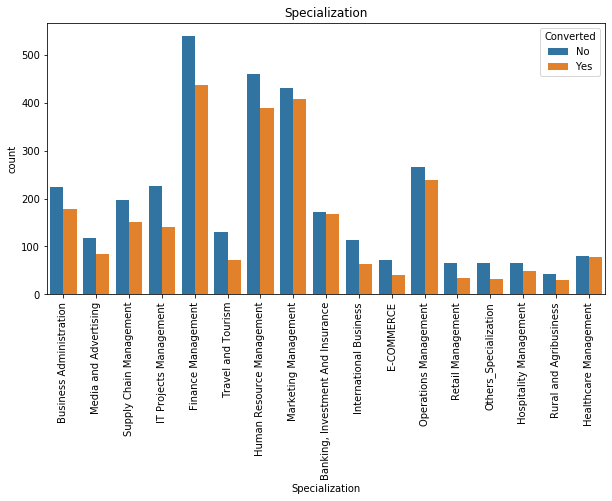

In [37]:
select_to_nan('Specialization',False)
group_Others('Specialization',1)

**Inference**
- More number of leads are from Finance Management specializations.
- Conversion rates are more for Banking, Investments, Marketing Management and Operation Management.
- Total Number of leads are less from Health care Management, however there is approx 50-50 conversion rate so need to concentrate more on such group.

#### **How did you hear about X Education**

Select                   71.70
Online Search            11.49
Word Of Mouth             4.95
Student of SomeSchool     4.41
Other                     2.64
Multiple Sources          2.16
Advertisements            1.00
Social Media              0.95
Email                     0.37
SMS                       0.33
Name: How did you hear about X Education, dtype: float64 




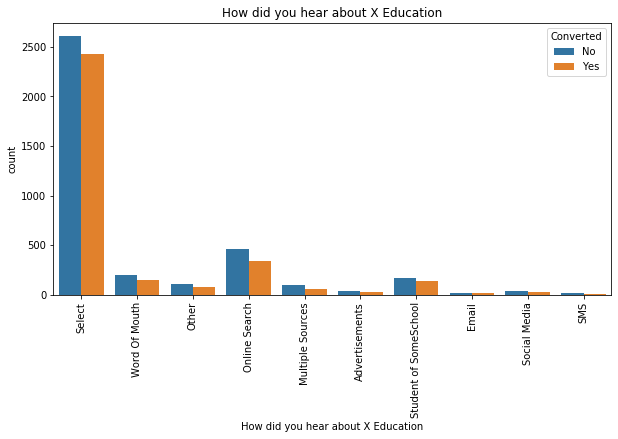

In [38]:
detail_plot('How did you hear about X Education')

*'Select' has high number of occurrence, which is select in the drop down as placeholder, so it is ideally a missing entry, so removing or converting them as nan*

***Select to NaN***

Online Search            40.60
Word Of Mouth            17.49
Student of SomeSchool    15.58
Other                     9.35
Multiple Sources          7.64
Advertisements            3.52
Social Media              3.37
Email                     1.31
SMS                       1.16
Name: How did you hear about X Education, dtype: float64 




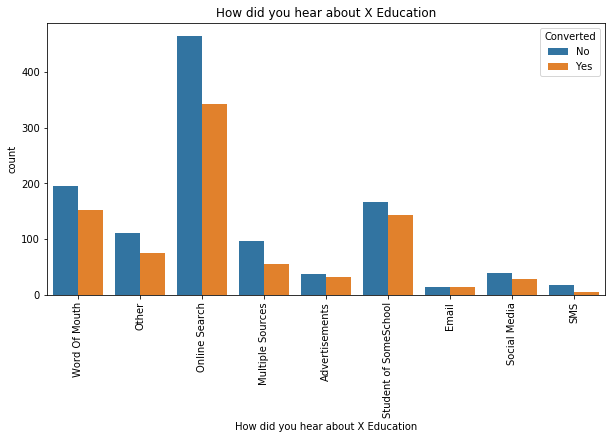

In [39]:
select_to_nan('How did you hear about X Education')

**Inference**
- Total Number of leads are from Online search and conversion rates are also more in number.
- Email has least number of leads, however the count for converted and non converted leads are similar

#### **What is your current occupation**

Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64 




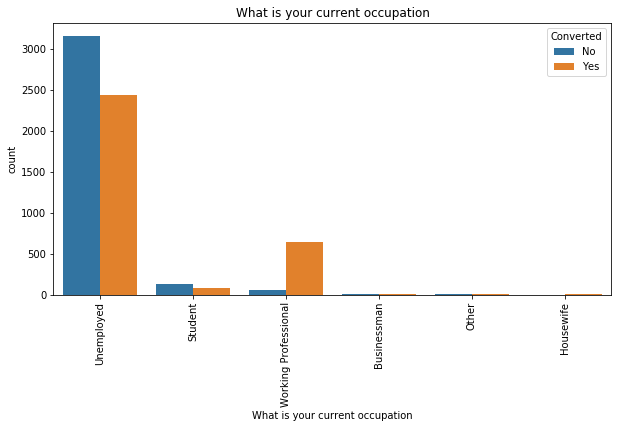

In [40]:
detail_plot('What is your current occupation')

**Inference**
- Unemployed are high in both converted and non converted categories.
- The rate of leads conversion is higher for Working Professional.

#### **What matters most to you in choosing a course**

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64 




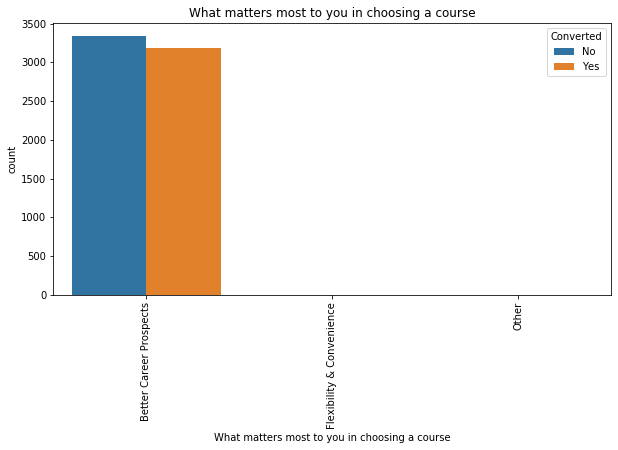

In [41]:
detail_plot('What matters most to you in choosing a course')

- For both converted and non converted categories better career prospects are in high number and in total it is 99.9% and hence is with low variance

*Dropping the features as 99% belong to one category and low variance*

In [42]:
df_leads.drop(columns=['What matters most to you in choosing a course'],inplace=True)

#### **Lead Profile**

Select                         63.48
Potential Lead                 24.70
Other Leads                     7.46
Student of SomeSchool           3.69
Lateral Student                 0.37
Dual Specialization Student     0.31
Name: Lead Profile, dtype: float64 




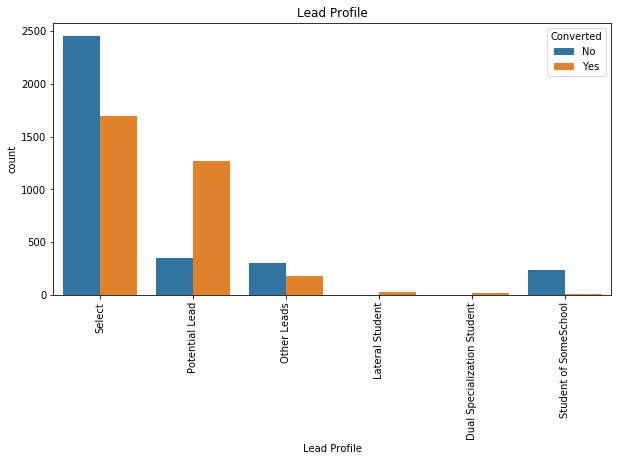

In [43]:
detail_plot('Lead Profile')

*'Select' has high number of occurrence, which is select in the drop down as placeholder, so it is ideally a missing entry, so removing or converting them as nan*

***Select to Nan***

Potential Lead                 67.63
Other Leads                    20.42
Student of SomeSchool          10.10
Lateral Student                 1.01
Dual Specialization Student     0.84
Name: Lead Profile, dtype: float64 




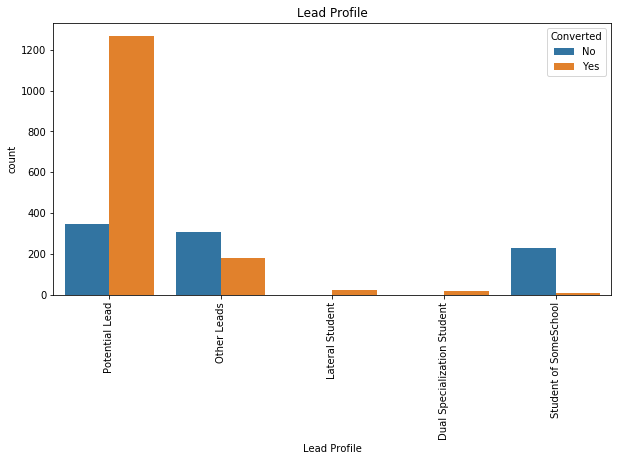

In [44]:
select_to_nan('Lead Profile')

**Inference**
- Total number of leads are higher for Potential leads and the conversion number and rate is also higher.
- Other leads and Student of Some school has less number of leads converted.
- Number of leads for Dual specialization student and Lateral student are very less and the converted numbers are higher compared to the total number of leads in those categories.

#### **City**

Mumbai                         41.20
Select                         28.76
Thane & Outskirts               9.62
Other Cities                    8.77
Other Cities of Maharashtra     5.84
Other Metro Cities              4.86
Tier II Cities                  0.95
Name: City, dtype: float64 




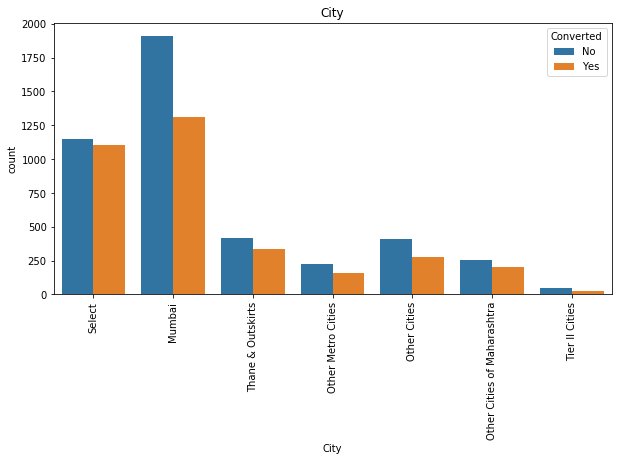

In [45]:
detail_plot('City')

*'Select' has high number of occurrence after Mumbai, which is select in the drop down as placeholder, so it is ideally a missing entry, so removing or converting them as nan*

***Select to NaN***


Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64 




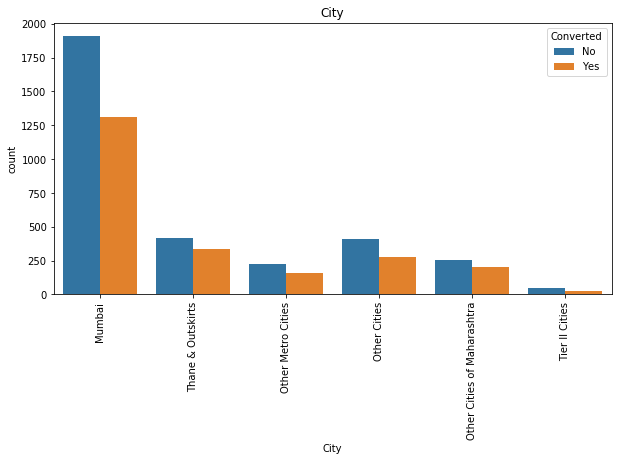

In [46]:
select_to_nan('City')

**Inference**
- Mumbai has higher number of occurrence in both converted and non-converted and way higher compared to other cities.

#### **Last Notable Activity**

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Resubscribed to emails           0.01
Form Submitted on Website        0.01
Approached upfront               0.01
Email Received                   0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64 




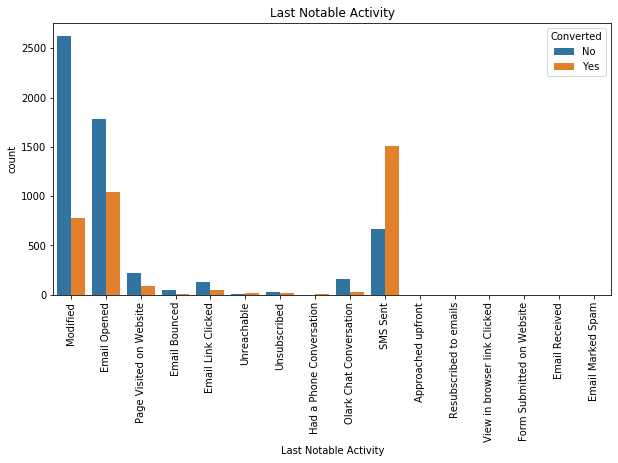

In [47]:
detail_plot('Last Notable Activity')

*There are many categories with very low number of occurrence and so, we can group them to a category called 'others'*

Categorizing < 1% as Others

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Others_Last Notable Activity     1.73
Name: Last Notable Activity, dtype: float64 




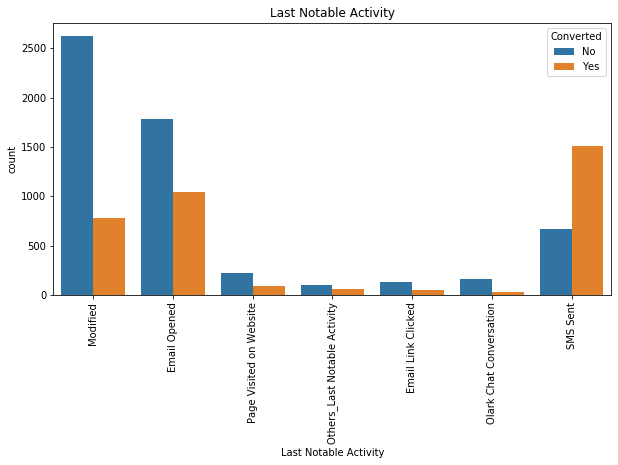

In [48]:
group_Others('Last Notable Activity',1)

**Inference**
- Modified has more number of leads, however the conversion rate is low.
- Total number of leads are less from Others category
- SMS Sent has higher lead conversion rate and number.

**Checking null percentage**

In [49]:
df_leads.isnull().mean().round(4)*100

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
Lead Profile                              74.19
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### ***Dropping columns with high missing values***

In [50]:
drop_features = df_leads.columns[df_leads.isnull().mean()*100>35]
drop_features

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [51]:
df_leads.drop(columns=drop_features,inplace=True)

In [52]:
df_leads.isnull().mean().round(4)*100

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### **Imputing the missing values**

*For numerical variables using median*

In [53]:
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(),inplace=True)
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(),inplace=True)
df_leads.isnull().mean().round(4)*100

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              1.11
What is your current occupation           29.11
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

*For Categorical variables using mode*

In [54]:
df_leads['Lead Source'].fillna(df_leads['Lead Source'].mode()[0],inplace=True)
df_leads['Last Activity'].fillna(df_leads['Last Activity'].mode()[0],inplace=True)
df_leads['What is your current occupation'].fillna(df_leads['What is your current occupation'].mode()[0],inplace=True)

In [55]:
df_leads.isnull().mean().round(4)*100

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### **Visualizing the Numerical Columns**

In [56]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   What is your current occupation         9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int64  
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


Function to plot the box plots

In [57]:
def boxplots(col_name,perc=100):
    perc/=100
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    sns.boxplot(df_leads[(df_leads.Converted==0) & 
                         (df_leads[col_name]<=df_leads[col_name].quantile(perc))][col_name])
    plt.title('Not Converted')
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(df_leads[(df_leads.Converted==1) & 
                         (df_leads[col_name]<=df_leads[col_name].quantile(perc))][col_name])
    plt.title('Converted')
    plt.xticks(rotation=90)
    plt.show()

#### **Total Visits**

Box plot for Total Visit for entire data

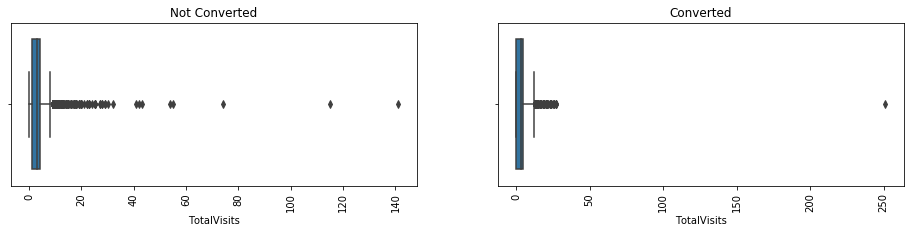

In [58]:
boxplots('TotalVisits')

- There are extreme outliers for Total Visits in both converted and non converted categories.

Box plot for Total Visit for 99th percentile (to remove outliers)

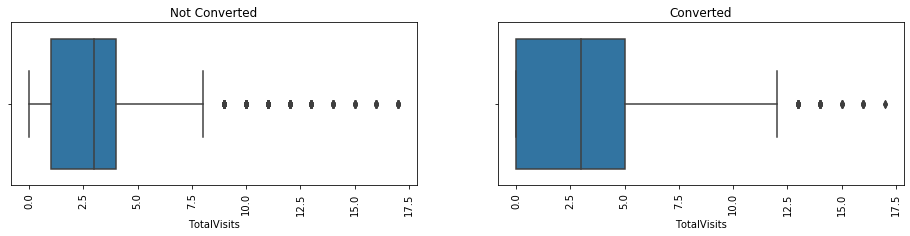

In [59]:
boxplots('TotalVisits',99)

- With 99th percentile data, the box plot is much clear with minimal outliers.
- The Median of total visits for non converted is 2.7 and max is at 7.5
- The Median of total visits for converted is around 2.7 and max is at 12.5. The spread is more for converted, with minimum and 25th percentile at 0

***Removing the extreme outliers from the dataset***

In [60]:
print('Shape of Dataframe before dropping :',df_leads.shape)
Q99=df_leads['TotalVisits'].quantile(.99)
df_leads=df_leads[df_leads['TotalVisits']<=Q99]
print('Shape of Dataframe after dropping :',df_leads.shape)

Shape of Dataframe before dropping : (9240, 10)
Shape of Dataframe after dropping : (9157, 10)


#### **Total Time Spent on Website**

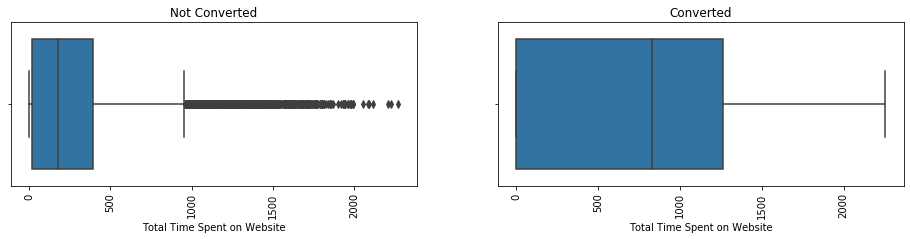

In [61]:
boxplots('Total Time Spent on Website')

- The Median of total time spent on website for non converted is 250 and max is at 1000. There are outliers
- The Median of total visits for converted is around 800 and max is at 2300. The spread is more for converted, and there are no outliers, with minimum and 25th percentile a 0.

#### **Page Views Per Visit**

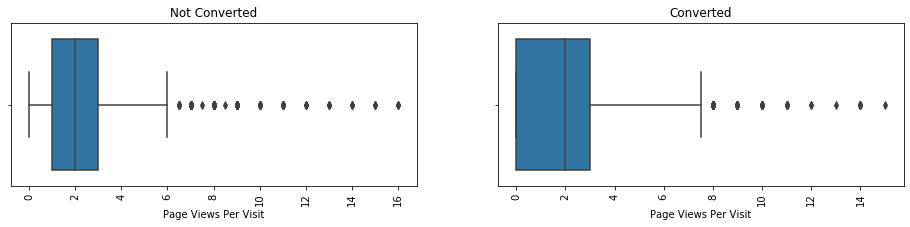

In [62]:
boxplots('Page Views Per Visit')


- The box plot has outliers at higher values.
- The Median of Page View per visit for non converted is 2 and max is at 6
- The Median of Page View per visit for converted is around 2 and max is at 7.8. The spread is more for converted, with minimum and 25th percentile a 0

#### **Pairplot**

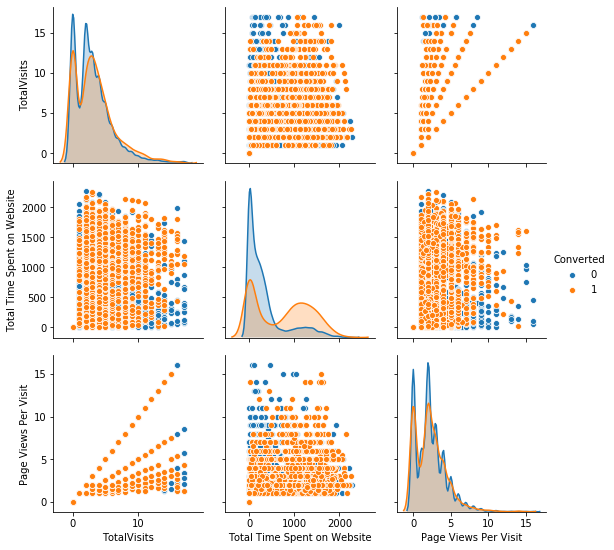

In [63]:
features = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
sns.pairplot(df_leads[features],hue='Converted',diag_kind='kde')
plt.show()

- The distribution plot shows that all the numerical data is right skewed and the converted leads show a bimodal trend.
- Total Visits and Page Views per Visit are positively correlated

**Checking for Correlation**

In [64]:
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
df_leads[features].corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.343668,0.740431
Total Time Spent on Website,0.343668,1.000000,0.329966
Page Views Per Visit,0.740431,0.329966,1.000000


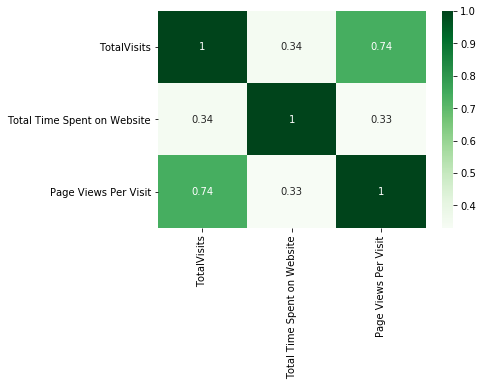

In [65]:
sns.heatmap(df_leads[features].corr(),cmap='Greens',annot=True)
plt.show()

- Total Visits and Page Views per Visit are positively correlated.

## Step 3 : Data Preparation

**Renaming the Column names**

In [66]:
df_leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [67]:
df_leads.columns = ['LeadOrigin', 'LeadSource', 'Converted', 'TotalVisits', 'TotalTimeSpent', 
                    'PageViewsPerVisit', 'LastActivity', 'CurrentOccupation', 
                    'FreeCopy', 'LastNotableActivity']

In [68]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LeadOrigin           9157 non-null   object 
 1   LeadSource           9157 non-null   object 
 2   Converted            9157 non-null   int64  
 3   TotalVisits          9157 non-null   float64
 4   TotalTimeSpent       9157 non-null   int64  
 5   PageViewsPerVisit    9157 non-null   float64
 6   LastActivity         9157 non-null   object 
 7   CurrentOccupation    9157 non-null   object 
 8   FreeCopy             9157 non-null   int64  
 9   LastNotableActivity  9157 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


#### **Converting the categorical features to dummies (one hot encoding with drop first)**

In [69]:
def create_dummy(col_name):
    df_dummy = pd.get_dummies(df_leads[col_name],prefix=col_name)
    for cat_name in df_dummy.columns:  
        if 'Other' in cat_name: break;
    df_dummy.drop(columns = cat_name,inplace=True)
    return df_dummy

In [70]:
for col_name in df_leads.select_dtypes(['object']):
    df_leads = pd.concat([df_leads, create_dummy(col_name)],axis=1)

df_leads.drop(columns = df_leads.select_dtypes(['object']),inplace=True)

In [71]:
df_leads.shape

(9157, 36)

In [72]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9157 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Converted                                    9157 non-null   int64  
 1   TotalVisits                                  9157 non-null   float64
 2   TotalTimeSpent                               9157 non-null   int64  
 3   PageViewsPerVisit                            9157 non-null   float64
 4   FreeCopy                                     9157 non-null   int64  
 5   LeadOrigin_API                               9157 non-null   uint8  
 6   LeadOrigin_Landing Page Submission           9157 non-null   uint8  
 7   LeadOrigin_Lead Add Form                     9157 non-null   uint8  
 8   LeadOrigin_Lead Import                       9157 non-null   uint8  
 9   LeadSource_Direct Traffic                    9157 non-null   uint8  
 10  

**Correlation with dummy variables**

In [73]:
df_leads.corr()

,Converted,TotalVisits,TotalTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,...,CurrentOccupation_Housewife,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent
Converted,1.000000,0.043811,0.361979,-0.003569,-0.040336,-0.121967,-0.051452,0.323304,-0.023738,-0.079979,...,0.041794,-0.005192,-0.279628,0.313508,-0.035067,-0.024124,-0.244479,-0.074067,-0.034983,0.353658
TotalVisits,0.043811,1.000000,0.343668,0.740431,0.281601,-0.291761,0.426014,-0.249059,-0.045823,0.121559,...,-0.007843,-0.030459,0.013538,-0.002566,-0.009506,0.080190,-0.142834,-0.055133,0.186090,0.016281
TotalTimeSpent,0.361979,0.343668,1.000000,0.329966,0.169653,-0.202474,0.277552,-0.139634,-0.034892,0.135506,...,0.007215,-0.013636,-0.084018,0.097143,-0.036815,0.009496,-0.107072,-0.053116,0.027398,0.125958
PageViewsPerVisit,-0.003569,0.740431,0.329966,1.000000,0.284808,-0.359612,0.505168,-0.271820,-0.049896,0.141235,...,-0.007789,-0.032635,0.023069,-0.011026,-0.025562,0.073325,-0.103710,-0.090580,0.022115,0.061721
FreeCopy,-0.040336,0.281601,0.169653,0.284808,1.000000,-0.474771,0.568848,-0.180336,-0.052082,0.603801,...,0.006448,-0.004352,0.008737,-0.004947,0.013414,0.060105,-0.083283,-0.056492,0.027642,0.030101
LeadOrigin_API,-0.121967,-0.291761,-0.202474,-0.359612,-0.474771,1.000000,-0.841541,-0.232667,-0.062053,-0.437593,...,-0.019613,-0.003517,0.087714,-0.097896,0.019890,-0.048343,0.105100,0.135062,-0.026240,-0.104636
LeadOrigin_Landing Page Submission,-0.051452,0.426014,0.277552,0.505168,0.568848,-0.841541,1.000000,-0.307268,-0.081949,0.531260,...,-0.001746,-0.000018,0.009938,-0.009007,-0.016974,0.071855,-0.101194,-0.114081,0.038630,0.058512
LeadOrigin_Lead Add Form,0.323304,-0.249059,-0.139634,-0.271820,-0.180336,-0.232667,-0.307268,1.000000,-0.022657,-0.179205,...,0.039594,0.009895,-0.182687,0.197897,-0.001401,-0.049189,-0.013840,-0.029856,-0.020064,0.092843
LeadOrigin_Lead Import,-0.023738,-0.045823,-0.034892,-0.049896,-0.052082,-0.062053,-0.081949,-0.022657,1.000000,-0.047794,...,-0.002570,-0.011880,0.016978,-0.011702,-0.010755,0.012692,0.036993,-0.011070,-0.014033,-0.039847
LeadSource_Direct Traffic,-0.079979,0.121559,0.135506,0.141235,0.603801,-0.437593,0.531260,-0.179205,-0.047794,1.000000,...,-0.012919,0.032231,-0.004947,-0.011756,0.008683,0.034489,-0.053713,-0.070018,0.050009,0.021756


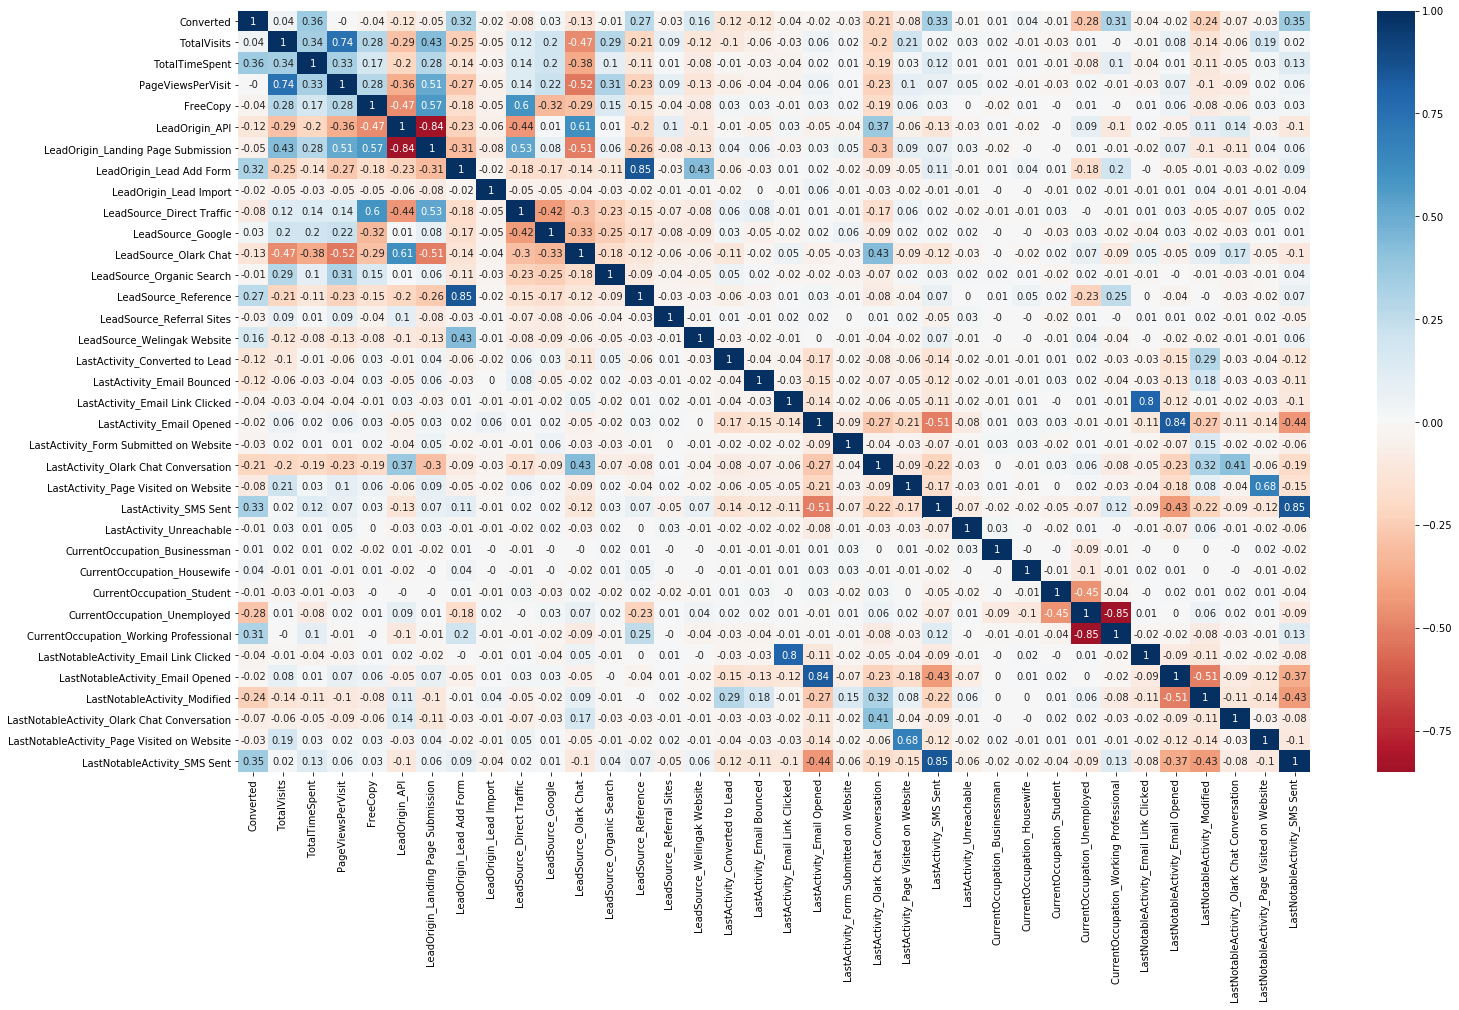

In [74]:
plt.figure(figsize=(24,14))
sns.heatmap(df_leads.corr().round(2),cmap='RdBu',annot=True,center=0)
plt.show()

- **Lead Origin API** and **Lead Origin_Landing Page Submission** are highly  negatively correlated.
- **Lead Source Reference** and **Lead Origin Lead Add form** are highly positively correlated.
- **Last Notable activity email link clicked** and **Last activity email link clicked* are highly positively correlated.
- **Last Notable activity email opened** and **Last activity email opened** are highly positively correlated.
- **Last Notable activity SMS sent** and **Last activity SMS sent** are highly positively correlated.
- **Current Occupation unemployed** and **current occupation working professional** are highly correlated.

**Removing the highly correlated dummy variables**

In [75]:
df_leads.columns

Index(['Converted', 'TotalVisits', 'TotalTimeSpent', 'PageViewsPerVisit',
       'FreeCopy', 'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Form Submitted on Website',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'LastActivity_Unreachable', 'CurrentOccupation_Businessman',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',

In [76]:
features=['LeadOrigin_Landing Page Submission','LeadOrigin_Lead Add Form','LastNotableActivity_Email Link Clicked',
          'LastNotableActivity_Email Opened','LastNotableActivity_SMS Sent','CurrentOccupation_Unemployed']

In [77]:
df_leads.drop(columns=features,inplace=True)

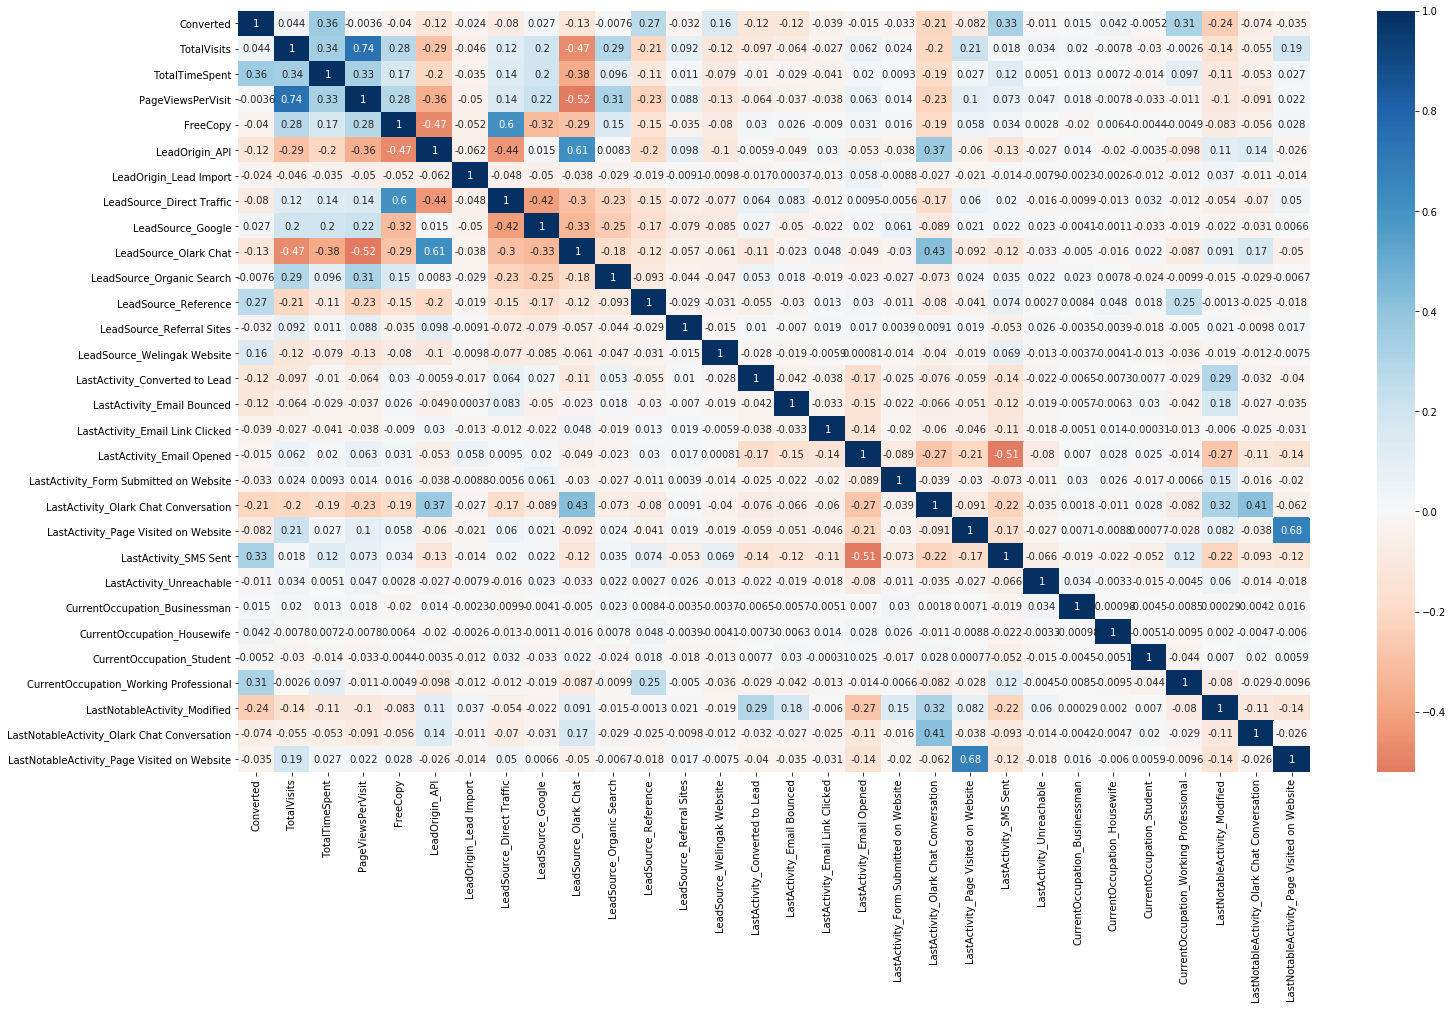

In [78]:
plt.figure(figsize=(24,14))
sns.heatmap(df_leads.corr(),cmap='RdBu',annot=True,center=0)
plt.show()

Correlation seems good. Nothing is above ±0.80

## Step 4 : Test Train split

In [79]:
features= list(df_leads.columns)
features.remove('Converted')

In [80]:
y = df_leads.Converted
X = df_leads[features]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

**Checking Shape**

In [82]:
df_leads.shape

(9157, 30)

In [83]:
X.shape

(9157, 29)

In [84]:
X_train.shape

(6409, 29)

In [85]:
y_train.shape

(6409,)

In [86]:
X_test.shape

(2748, 29)

In [87]:
y_test.shape

(2748,)

## Step 5 : Feature scaling

In [88]:
df_leads.columns

Index(['Converted', 'TotalVisits', 'TotalTimeSpent', 'PageViewsPerVisit',
       'FreeCopy', 'LeadOrigin_API', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Olark Chat', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Form Submitted on Website',
       'LastActivity_Olark Chat Conversation',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent',
       'LastActivity_Unreachable', 'CurrentOccupation_Businessman',
       'CurrentOccupation_Housewife', 'CurrentOccupation_Student',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Modified',
       'LastNotableActivity_Olark Chat Conversation',
       'LastNotableActivity_Page Visited on Website'],
      dtype=

In [89]:
features = ['TotalVisits', 'TotalTimeSpent', 'PageViewsPerVisit']

In [90]:
X_train.head()

,TotalVisits,TotalTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_API,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,...,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Student,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
295,5.0,297,2.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2600,3.0,140,3.0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
3267,0.0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3422,4.0,181,4.0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
650,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_train.head()

,TotalVisits,TotalTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_API,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,...,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Student,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
295,0.603621,-0.349990,0.076954,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2600,-0.074190,-0.636494,0.323358,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
3267,-1.090906,-0.891976,-1.155068,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3422,0.264715,-0.561675,0.816167,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
650,-1.090906,-0.891976,-1.155068,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **Checking conversion rate**

In [92]:
df_leads.Converted.value_counts(normalize=True)[1]*100

38.49514032980233

*38.5% people have joined the course by X education*

## Step 6 : Model building

#### **Model 1 : With all features**

In [93]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2681.3
Date:                Mon, 23 Nov 2020   Deviance:                       5362.5
Time:                        15:13:39   Pearson chi2:                 7.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

Many features are with higher p value

#### **Using RFE**

In [94]:
logreg = LogisticRegression()

In [95]:
rfe = RFE(logreg, 15)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
df_RFE = pd.DataFrame()
df_RFE['Feature'] = X_train.columns
df_RFE['RFE Support'] = rfe.support_
df_RFE['RFE Ranking'] = rfe.ranking_
df_RFE.sort_values(by='RFE Ranking')

,Feature,RFE Support,RFE Ranking
14,LastActivity_Email Bounced,True,1
1,TotalTimeSpent,True,1
26,LastNotableActivity_Modified,True,1
25,CurrentOccupation_Working Professional,True,1
23,CurrentOccupation_Housewife,True,1
22,CurrentOccupation_Businessman,True,1
6,LeadSource_Direct Traffic,True,1
7,LeadSource_Google,True,1
9,LeadSource_Organic Search,True,1
10,LeadSource_Reference,True,1


**RFE Features**

In [97]:
model_features = list(X_train.columns[rfe.support_])
model_features

['TotalTimeSpent',
 'LeadSource_Direct Traffic',
 'LeadSource_Google',
 'LeadSource_Organic Search',
 'LeadSource_Reference',
 'LeadSource_Referral Sites',
 'LeadSource_Welingak Website',
 'LastActivity_Email Bounced',
 'LastActivity_Olark Chat Conversation',
 'LastActivity_SMS Sent',
 'CurrentOccupation_Businessman',
 'CurrentOccupation_Housewife',
 'CurrentOccupation_Working Professional',
 'LastNotableActivity_Modified',
 'LastNotableActivity_Olark Chat Conversation']

In [98]:
features=1

In [99]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'PageViewsPerVisit', 'FreeCopy', 'LeadOrigin_API',
       'LeadOrigin_Lead Import', 'LeadSource_Olark Chat',
       'LastActivity_Converted to Lead', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_Unreachable',
       'CurrentOccupation_Student',
       'LastNotableActivity_Page Visited on Website'],
      dtype='object')

#### **Model 2**

*Function to calculate and print summary and VIF*

In [100]:
def log_summary_vif(drop_feature=''):
    if drop_feature!='' : model_features.remove(drop_feature)
    X_train_sm = sm.add_constant(X_train[model_features])
    logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm2.fit()
    print(res.summary())

    #generate_vif
    vif = pd.DataFrame()
    vif['Features'] = X_train[model_features].columns
    vif['VIF'] = [variance_inflation_factor(X_train[model_features].values, i) for i in range(X_train[model_features].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)
    return res,X_train_sm

In [101]:
res,X_train_sm=log_summary_vif()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6393
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2713.6
Date:                Mon, 23 Nov 2020   Deviance:                       5427.1
Time:                        15:13:40   Pearson chi2:                 6.91e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

,Features,VIF
13,LastNotableActivity_Modified,1.94
8,LastActivity_Olark Chat Conversation,1.72
9,LastActivity_SMS Sent,1.47
2,LeadSource_Google,1.42
1,LeadSource_Direct Traffic,1.36
14,LastNotableActivity_Olark Chat Conversation,1.33
4,LeadSource_Reference,1.21
3,LeadSource_Organic Search,1.19
12,CurrentOccupation_Working Professional,1.18
0,TotalTimeSpent,1.16


**CurrentOccupation_Housewife** has p-value greater than 0.05

#### **Model 3**

In [102]:
res,X_train_sm=log_summary_vif('CurrentOccupation_Housewife')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.1
Date:                Mon, 23 Nov 2020   Deviance:                       5434.1
Time:                        15:13:40   Pearson chi2:                 6.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

,Features,VIF
12,LastNotableActivity_Modified,1.94
8,LastActivity_Olark Chat Conversation,1.72
9,LastActivity_SMS Sent,1.47
2,LeadSource_Google,1.42
1,LeadSource_Direct Traffic,1.36
13,LastNotableActivity_Olark Chat Conversation,1.33
4,LeadSource_Reference,1.21
3,LeadSource_Organic Search,1.19
11,CurrentOccupation_Working Professional,1.18
0,TotalTimeSpent,1.16


**CurrentOccupation_Businessman** has p-value greater than 0.05

#### **Model 4**

In [103]:
res,X_train_sm=log_summary_vif('CurrentOccupation_Businessman')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6395
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.1
Date:                Mon, 23 Nov 2020   Deviance:                       5436.2
Time:                        15:13:41   Pearson chi2:                 6.95e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

,Features,VIF
11,LastNotableActivity_Modified,1.94
8,LastActivity_Olark Chat Conversation,1.72
9,LastActivity_SMS Sent,1.47
2,LeadSource_Google,1.42
1,LeadSource_Direct Traffic,1.36
12,LastNotableActivity_Olark Chat Conversation,1.33
4,LeadSource_Reference,1.20
3,LeadSource_Organic Search,1.19
10,CurrentOccupation_Working Professional,1.18
0,TotalTimeSpent,1.16


Removing **LastNotableActivity_Olark Chat Conversation** with p-value of 3%, to remove complexity

#### **Model 5 (Final Model)**

In [104]:
res,X_train_sm=log_summary_vif('LastNotableActivity_Olark Chat Conversation')

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6409
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.5
Date:                Mon, 23 Nov 2020   Deviance:                       5441.1
Time:                        15:13:41   Pearson chi2:                 7.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

,Features,VIF
11,LastNotableActivity_Modified,1.80
9,LastActivity_SMS Sent,1.47
2,LeadSource_Google,1.41
1,LeadSource_Direct Traffic,1.35
8,LastActivity_Olark Chat Conversation,1.31
4,LeadSource_Reference,1.20
3,LeadSource_Organic Search,1.18
10,CurrentOccupation_Working Professional,1.18
0,TotalTimeSpent,1.16
7,LastActivity_Email Bounced,1.11


In [105]:
attr_weight = pd.DataFrame({'Features' : ['Intercept']+model_features, 'Coefficients' : res.params.values,
                             'Absolute' : abs(res.params.values)}).sort_values('Absolute',ascending=False)
attr_weight.reset_index(drop=True,inplace=True)
attr_weight

,Features,Coefficients,Absolute
0,LeadSource_Welingak Website,4.485699,4.485699
1,LeadSource_Reference,2.989491,2.989491
2,CurrentOccupation_Working Professional,2.713868,2.713868
3,LeadSource_Direct Traffic,-1.328911,1.328911
4,LastActivity_Email Bounced,-1.324628,1.324628
5,LastActivity_SMS Sent,1.235175,1.235175
6,LeadSource_Organic Search,-1.157008,1.157008
7,TotalTimeSpent,1.093461,1.093461
8,LastActivity_Olark Chat Conversation,-1.032255,1.032255
9,LeadSource_Referral Sites,-1.007763,1.007763


## Step 7 : Evaluation

**Getting the predicted values on the train set**

In [106]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

295     0.168352
2600    0.760136
3267    0.990878
3422    0.355798
650     0.876154
1378    0.049726
9106    0.520861
5861    0.096374
4316    0.455890
5836    0.447067
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16835179, 0.76013645, 0.99087787, 0.35579839, 0.87615412,
       0.04972604, 0.52086094, 0.09637384, 0.4558899 , 0.44706663])

**Creating a dataframe with the actual converted flag and the predicted probabilities**

In [108]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final['Lead_Score'] = round(y_train_pred_final['Converted_prob']*100,0).astype(int)
y_train_pred_final.head()

,Converted,Converted_prob,ID,Lead_Score
0,0,0.168352,295,17
1,1,0.760136,2600,76
2,1,0.990878,3267,99
3,0,0.355798,3422,36
4,1,0.876154,650,88


**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [109]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [110]:
y_train_pred_final.head()

,Converted,Converted_prob,ID,Lead_Score,predicted
0,0,0.168352,295,17,0
1,1,0.760136,2600,76,1
2,1,0.990878,3267,99,1
3,0,0.355798,3422,36,0
4,1,0.876154,650,88,1


Lead score is the score where 100 means the probability of a lead converting is higher and 0 means probability of lead conversion is low

#### **Confusion Matrix**

In [111]:
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3443  465]
 [ 765 1736]]


In [112]:
def cm_heatmap(cm):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm,cmap='Blues',annot=True,fmt='g')
    plt.xticks([.5,1.5],['Not Converted','Converted'])
    plt.yticks([.18,1.25],['Not Converted','Converted'])
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted',fontsize=12)
    plt.ylabel('Actual',fontsize=12)
    plt.show()

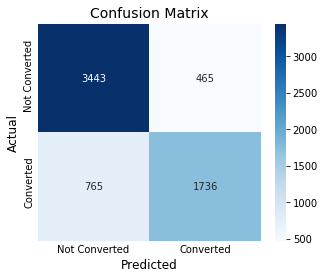

In [113]:
cm_heatmap(confusion)

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### **Accuracy Score**

In [115]:
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8080823841472928

#### **Classification Report**

In [116]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      3908
           1       0.79      0.69      0.74      2501

    accuracy                           0.81      6409
   macro avg       0.80      0.79      0.79      6409
weighted avg       0.81      0.81      0.81      6409



#### **Precision**

In [117]:
precision = TP / float(TP+FP)
precision

0.7887323943661971

In [118]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7887323943661971

#### **Sensitivity or Recall or True Positive rate**

In [119]:
recall = TP / float(TP+FN)
recall

0.6941223510595762

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6941223510595762

#### **F1 Score**

In [121]:
f1score = 2*precision*recall/(precision+recall)
f1score

0.7384091875797533

In [122]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7384091875797533

#### **Specificity**

In [123]:
specificity = TN / float(TN+FP)
specificity

0.8810133060388946

#### **False Positive rate (1-Specificity)**

In [124]:
FPR = (FP/ float(TN+FP))
FPR

0.11898669396110542

#### **Positive predictive value**

In [125]:
PPV = (TP / float(TP+FP))
PPV

0.7887323943661971

#### **Negative predictive value**

In [126]:
NPV = (TN / float(TN+ FN))
NPV

0.8182034220532319

### **Precision Recall curve**

In [127]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

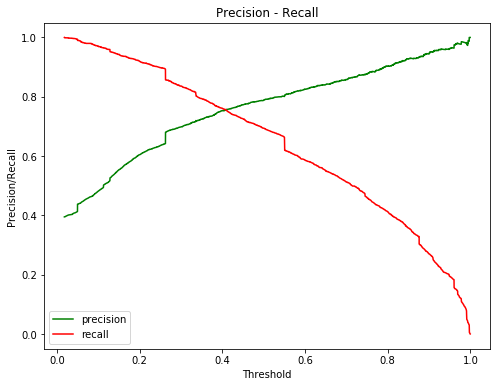

In [128]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision - Recall')
plt.show()

### **ROC Curve**


In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,  drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [130]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, 
                                  y_train_pred_final.Converted_prob, drop_intermediate = False )

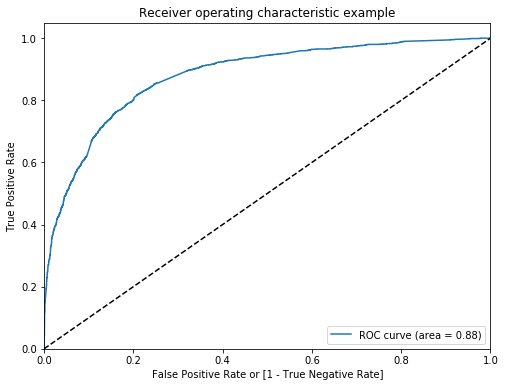

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve area value is 0.88 indicating a good predictive model.


## Step 8 : Finding Optimal Cutoff Point

**Dataframe updated with different probability cutoffs**

In [132]:
for i in [x/100 for x in range(0,100,5)]:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,ID,Lead_Score,predicted,0.0,0.05,0.1,0.15,0.2,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.168352,295,17,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.760136,2600,76,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
2,1,0.990878,3267,99,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0.355798,3422,36,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0.876154,650,88,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


**Dataframe with accuracy sensitivity and specificity for various probability cutoffs**

In [133]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

for i in [x/100 for x in range(0,100,5)]:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00  0.390232     1.000000     0.000000
0.05  0.05  0.500390     0.990004     0.187052
0.10  0.10  0.581214     0.970012     0.332395
0.15  0.15  0.681542     0.942823     0.514330
0.20  0.20  0.734124     0.919632     0.615404
0.25  0.25  0.759557     0.898041     0.670931
0.30  0.30  0.795288     0.836066     0.769191
0.35  0.35  0.801529     0.793683     0.806551
0.40  0.40  0.809487     0.760896     0.840583
0.45  0.45  0.809799     0.725710     0.863613
0.50  0.50  0.808082     0.694122     0.881013
0.55  0.55  0.804338     0.663335     0.894575
0.60  0.60  0.790295     0.586565     0.920676
0.65  0.65  0.784210     0.550980     0.933470
0.70  0.70  0.776876     0.512995     0.945752
0.75  0.75  0.764082     0.459816     0.958802
0.80  0.80  0.753472     0.412235     0.971853
0.85  0.85  0.738649     0.357857     0.982344
0.90  0.90  0.709315     0.270692     0.990020
0.95  0.95  0.682946     0.195122     0.995138


**Plot of accuracy sensitivity and specificity for various probabilities**

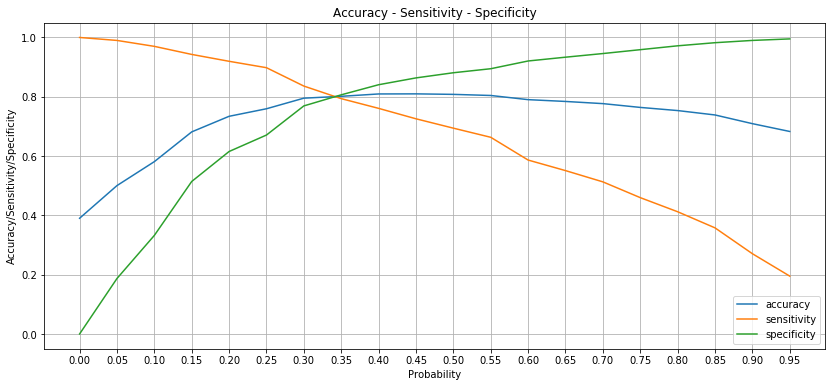

In [134]:
ax = cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'],figsize=(14,6))
minor_ticks=np.arange(0,1,0.05)
ax.set_xticks(minor_ticks)
ax.set_title('Accuracy - Sensitivity - Specificity')
ax.set_xlabel('Probability')
ax.set_ylabel('Accuracy/Sensitivity/Specificity')
ax.grid()
plt.show()

From the curve above, 0.33 is the optimum point to take it as a cutoff probability.


**Optimal Cut-off using threshold**

In [135]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, 
                                  y_train_pred_final.Converted_prob, drop_intermediate = False )
print('Optimal cutoff : %.2f'%thresholds[np.argmax(tpr - fpr)])

Optimal cutoff : 0.33


**Updating predictions with optimal cutoff value**


In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final=y_train_pred_final[['Converted','Converted_prob','ID','Lead_Score',
                                       'predicted','final_predicted']]
y_train_pred_final.head()

,Converted,Converted_prob,ID,Lead_Score,predicted,final_predicted
0,0,0.168352,295,17,0,0
1,1,0.760136,2600,76,1,1
2,1,0.990878,3267,99,1,1
3,0,0.355798,3422,36,0,1
4,1,0.876154,650,88,1,1


#### **Confusion Matrix**

In [137]:
confusion_optimum = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_optimum

array([[3089,  819],
       [ 455, 2046]], dtype=int64)

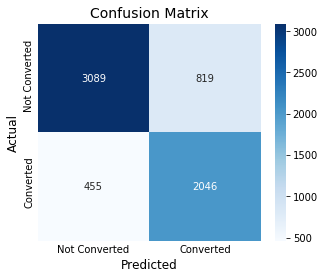

In [138]:
cm_heatmap(confusion_optimum)

In [139]:
TP = confusion_optimum[1,1] # true positive 
TN = confusion_optimum[0,0] # true negatives
FP = confusion_optimum[0,1] # false positives
FN = confusion_optimum[1,0] # false negatives

#### **Accuracy Score**

In [140]:
accuracy_train = accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accuracy_train

0.8012170385395537

#### **Classification Report**

In [141]:
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      3908
           1       0.71      0.82      0.76      2501

    accuracy                           0.80      6409
   macro avg       0.79      0.80      0.80      6409
weighted avg       0.81      0.80      0.80      6409



#### **Precision**

In [142]:
precision_train = TP / float(TP+FP)
precision_train

0.7141361256544503

In [143]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7141361256544503

#### **Sensitivity or Recall or True positive rate**

In [144]:
recall_train = TP / float(TP+FN)
recall_train

0.8180727708916433

In [145]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8180727708916433

#### **F1 Score**

In [146]:
f1score_train = 2*precision_train*recall_train/(precision_train+recall_train)
f1score_train

0.7625792023853895

In [147]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7625792023853895

#### **Specificity**

In [148]:
specificity_train =TN / float(TN+FP)
specificity_train

0.7904298874104401

#### **False Positive rate (1-specificity)**

In [149]:
FPR_train =(FP/ float(TN+FP))
FPR_train

0.20957011258955988

#### **Positive predictive value**

In [150]:
PPV_train = (TP / float(TP+FP))
PPV_train

0.7141361256544503

#### **Negative predictive value**

In [151]:
NPV_train =  (TN / float(TN+ FN))
NPV_train

0.8716139954853274

## Step 9 : Making predictions on the test set

#### **Feature Scaling - Transform**

In [152]:
features = ['TotalVisits', 'TotalTimeSpent', 'PageViewsPerVisit']
X_test[features] = scaler.transform(X_test[features])
X_test.head()

,TotalVisits,TotalTimeSpent,PageViewsPerVisit,FreeCopy,LeadOrigin_API,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,...,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,CurrentOccupation_Businessman,CurrentOccupation_Housewife,CurrentOccupation_Student,CurrentOccupation_Working Professional,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
1060,-1.090906,-0.891976,-1.155068,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9153,-0.413096,0.051482,-0.169450,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1697,3.653770,-0.621895,5.744256,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0.264715,-0.590873,0.816167,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3786,-0.413096,1.940222,-0.169450,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Adding constant**

In [153]:
X_test_sm = sm.add_constant(X_test[model_features])

### **Making Prediction on test set**

In [154]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1060    0.550376
9153    0.586843
1697    0.165128
5204    0.169858
3786    0.969197
6445    0.252595
5191    0.049726
622     0.843021
2036    0.150548
5106    0.186648
dtype: float64

**Creating a dataframe with the actual converted flag and the predicted probabilities**

In [155]:
y_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_pred_final['ID'] = y_test.index
y_pred_final['Lead_Score'] = round(y_pred_final['Converted_Prob']*100,0).astype(int)
y_pred_final.head()

,Converted,Converted_Prob,ID,Lead_Score
1060,1,0.550376,1060,55
9153,0,0.586843,9153,59
1697,0,0.165128,1697,17
5204,0,0.169858,5204,17
3786,1,0.969197,3786,97


**Prediction with optimal cutoff value**


In [156]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Converted,Converted_Prob,ID,Lead_Score,final_predicted
1060,1,0.550376,1060,55,1
9153,0,0.586843,9153,59,1
1697,0,0.165128,1697,17,0
5204,0,0.169858,5204,17,0
3786,1,0.969197,3786,97,1


Lead score is the score where 100 means the probability of a lead converting is higher and 0 means probability of lead conversion is low

### **Accuracy Measures**


#### **Confusion Matrix**

In [157]:
confusion_test = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1326  398]
 [ 173  851]]


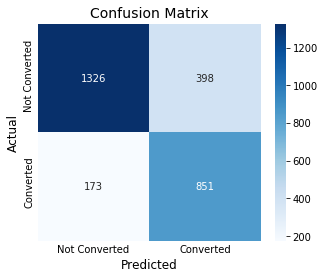

In [158]:
cm_heatmap(confusion_test)

In [159]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### **Accuracy Score**

In [160]:
accuracy_test = accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_test

0.7922125181950509

#### **Classification Report**

In [161]:
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1724
           1       0.68      0.83      0.75      1024

    accuracy                           0.79      2748
   macro avg       0.78      0.80      0.79      2748
weighted avg       0.81      0.79      0.80      2748



#### **Precision**

In [162]:
precision_test = TP / float(TP+FP)
precision_test

0.6813450760608487

In [163]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6813450760608487

#### **Sensitivity or Recall or True Positive rate**

In [164]:
recall_test = TP / float(TP+FN)
recall_test

0.8310546875

In [165]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8310546875

#### **F1 Score**

In [166]:
f1score_test = 2*precision_test*recall_test/(precision_test+recall_test)
f1score_test

0.7487901451825781

In [167]:
f1_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7487901451825781

#### **Specificity**

In [168]:
specificity_test = TN / float(TN+FP)
specificity_test

0.7691415313225058

#### **False Positive rate (1-Specificity)**

In [169]:
FPR_test = (FP/ float(TN+FP))
FPR_test

0.2308584686774942

#### **Positive predictive value**

In [170]:
PPV_test = (TP / float(TP+FP))
PPV_test

0.6813450760608487

#### **Negative predictive value**

In [171]:
NPV_test = (TN / float(TN+ FN))
NPV_test

0.8845897264843229

## Scores


In [172]:
new_line = '\t\t+---------------------------+----------------------+---------------------+'
substring = '|   Train set : %.2f   |   Test set : %.2f   |'
print(new_line+'\n\t\t| Accuracy Score            '+substring%(accuracy_train.round(4),accuracy_test.round(4)))
print(new_line+'\n\t\t| Precision Score           '+substring%(precision_train.round(4),precision_test.round(4)))
print(new_line+'\n\t\t| Recall Score              '+substring%(recall_train.round(4),recall_test.round(4)))
print(new_line+'\n\t\t| Specificity Score         '+substring%(specificity_train.round(4),specificity_test.round(4)))
print(new_line+'\n\t\t| F Score                   '+substring%(f1score_train.round(4),f1score_test.round(4)))
print(new_line+'\n\t\t| False positive rate       '+substring%(FPR_train.round(4),FPR_test.round(4)))
print(new_line+'\n\t\t| Positive predictive value '+substring%(PPV_train.round(4),PPV_test.round(4)))
print(new_line+'\n\t\t| Negative predictive value '+substring%(NPV_train.round(4),NPV_test.round(4)))
print(new_line)

		+---------------------------+----------------------+---------------------+
		| Accuracy Score            |   Train set : 0.80   |   Test set : 0.79   |
		+---------------------------+----------------------+---------------------+
		| Precision Score           |   Train set : 0.71   |   Test set : 0.68   |
		+---------------------------+----------------------+---------------------+
		| Recall Score              |   Train set : 0.82   |   Test set : 0.83   |
		+---------------------------+----------------------+---------------------+
		| Specificity Score         |   Train set : 0.79   |   Test set : 0.77   |
		+---------------------------+----------------------+---------------------+
		| F Score                   |   Train set : 0.76   |   Test set : 0.75   |
		+---------------------------+----------------------+---------------------+
		| False positive rate       |   Train set : 0.21   |   Test set : 0.23   |
		+---------------------------+----------------------+---------------------+

**Logit Formula**

In [173]:
attr_weight.head()

,Features,Coefficients,Absolute
0,LeadSource_Welingak Website,4.485699,4.485699
1,LeadSource_Reference,2.989491,2.989491
2,CurrentOccupation_Working Professional,2.713868,2.713868
3,LeadSource_Direct Traffic,-1.328911,1.328911
4,LastActivity_Email Bounced,-1.324628,1.324628


In [174]:
formula = 'logit(p) = log(p/(1-p)) = '
for i in range(len(attr_weight)):
    if attr_weight.loc[i,'Coefficients']<0 : formula+=' - '
    elif i>0 :  formula+=' + ' 
    if i%2==0 and i>0 : formula+='\n\t\t\t  '
    formula+='('+str(attr_weight.loc[i,'Absolute'].round(2))+' x '+attr_weight.loc[i,'Features']+')'
print(formula)

logit(p) = log(p/(1-p)) = (4.49 x LeadSource_Welingak Website) + (2.99 x LeadSource_Reference) + 
			  (2.71 x CurrentOccupation_Working Professional) - (1.33 x LeadSource_Direct Traffic) - 
			  (1.32 x LastActivity_Email Bounced) + (1.24 x LastActivity_SMS Sent) - 
			  (1.16 x LeadSource_Organic Search) + (1.09 x TotalTimeSpent) - 
			  (1.03 x LastActivity_Olark Chat Conversation) - (1.01 x LeadSource_Referral Sites) - 
			  (0.88 x LastNotableActivity_Modified) - (0.88 x LeadSource_Google) - 
			  (0.06 x Intercept)


## Conclusion

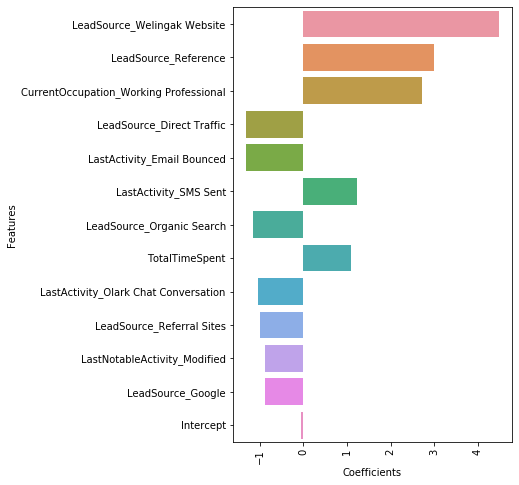

In [175]:
plt.figure(figsize=(5,8))
sns.barplot(y='Features',x='Coefficients', data = attr_weight)
plt.xticks(rotation=90)
plt.show()

##### The features that have a larger impact on lead conversion are in the order of:
1. Lead Source  
  - Welingak Website
  - Reference
  - Direct Traffic (Negative)
  - Organic Search (Negative)
  - Referral Sites (Negative)
  - Google (Negative)
2. Current Occupation 
  - Working Professional
3. Last Activity
  - Email Bounced (Negative)
  - SMS Sent
  - Olark Chat Conversation (Negative)
4. Total Time Spent
5. Last Notable Activity
  - Modified (Negative)
